Основная задача данного проекта - выяснить, на какие игры стоит сделать упор в рекламной компании, чтобы иметь максимальную прибыль. Необходимо выяснить "портрет покупателя", на каких платформах, в каких жанрах люди покупают игры, где какие игры пользуются наибольшей популярностью, а так же -  как рейтинг влияет на продажи.

Действовать будем по следующему плану: 
- Предобработка данных
- Работа с общим массивом данных для определения перспективных платформ
- Анализ рынков, жанров, объемов продаж, влияния факторов на них
- Формирование наиболее прибыльного с рекламной точки зрения жанра, платформы, рейтинга и региона продаж. 
- Подведение итогов, вывод, проверка гипотез от заказчика.

### Оглавление: 
1. Открытие и анализ таблиц
2. Подготовка данных. 
3. Исследовательский анализ данных. 
4. Портрет пользователя каждого региона. 
5. Проверка гипотез.

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as st

In [ ]:
df = pd.read_csv('/Users/artemdudkin/Desktop/Работы Юпитер/Сборный проект-1/Сборный Проект №1/games.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   years_of_release  16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      7983 non-null   float64
 9   user_score        9839 non-null   object 
 10  rating            9768 non-null   object 
 11  common_sales      16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.1+ MB


#### Шаг 2. Подготовка данных.

0. Заменим названия столбцов на нижний регистр

In [4]:
df = df.rename(columns={'Name':'name','Platform':'platform', 'Year_of_Release':'years_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

1. Начнем с обработки данных по столбцам. Пропуски, аномалии. 

In [5]:
#столбец Имя
df['name'].isna() #поиск пропусков
df['name'] = df['name'].fillna(0) #замена на нули
df.query('name == 0') # смотрим что в пропусках
# информация плохая, в исследовании не пригодится, можно удалить
df.drop(labels = [659,14244],axis = 0, inplace = True)

df['name'].value_counts() # видим много дубликатов
df.query('name == "Need for Speed: Most Wanted"') #игра была выпущена в 2012 году, а в таблице есть значения за 2005 годы. 
# проверил, это все - переиздания и спецверсии, можем игнорировать

,name,platform,years_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [6]:
# столбец Год релиза: 
df['years_of_release'].isna().sum() # поиск пропусков
df['years_of_release'] = df['years_of_release'].fillna(0).astype('int64') # обнуление и замена формата на число без пл.точки
df.query('years_of_release == 0') # только мешает, удалим
df = df.query('years_of_release != 0')

In [7]:
# столбец платформа
len(df['platform'].unique()) # проверяем количество уникальных значений - 31
df['platform'].value_counts().reset_index().count() # проверяем, что нет неявных дубликатов в названиях платформ - 31

index       31
platform    31
dtype: int64

In [8]:
# столбец Жанр
df['genre'].value_counts() # дубликатов нет

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [9]:
# столбец Оценка пользователей
df['user_score'].unique() # аномалий нет, есть пропуски, их не заполняем - не хочу портить среднюю оценку

# обнаружился индекс tbd
# согласно порталу Метакритик - tbd - это индекс, обозначающий, что у игры менее 4 обзоров от пользователей. 
df.query('user_score == "tbd"').head(50)
df.pivot_table(index='rating', values='user_score', aggfunc='count')
df.query('user_score == "tbd"').head(50)
# создадим новый фрейм для работы с чистыми данными (понадобится в дальнейшем)
df_rating = df.query('user_score != "tbd"')
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              14068 non-null  object 
 1   platform          14068 non-null  object 
 2   years_of_release  14068 non-null  int64  
 3   genre             14068 non-null  object 
 4   na_sales          14068 non-null  float64
 5   eu_sales          14068 non-null  float64
 6   jp_sales          14068 non-null  float64
 7   other_sales       14068 non-null  float64
 8   critic_score      6927 non-null   float64
 9   user_score        7463 non-null   object 
 10  rating            7442 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.3+ MB


In [10]:
df['rating'].value_counts()
df['rating'].unique()
# по заданию требуется найти тип 'tbd', но по двум проверкам его нет. 
# разберемся, что означают буквы, когда оба рейтинга - циферные:
df.query('rating == "E"')


,name,platform,years_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16663,E.T. The Extra-Terrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,tbd,E


In [50]:
df['rating'].isna().sum()
df['rating'] = df['rating'].fillna(-1) # Добавляю заглушку на -1 в рейтинг. 

Добавить столбец с суммой продаж по всем регионам.

In [12]:
df['common_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Вывод по разделу 1: 
Критические пропуски - название игры - удалены. 
Некритические - оставлены либо заменены на 0, для анализа. 

In [13]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'years_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   years_of_release  16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      7983 non-null   float64
 9   user_score        9839 non-null   object 
 10  rating            9768 non-null   object 
 11  common_sales      16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedeli

#### Раздел 3. Исследовательский анализ данных.

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:xlabel='Годы релиза', ylabel='Количество игр'>

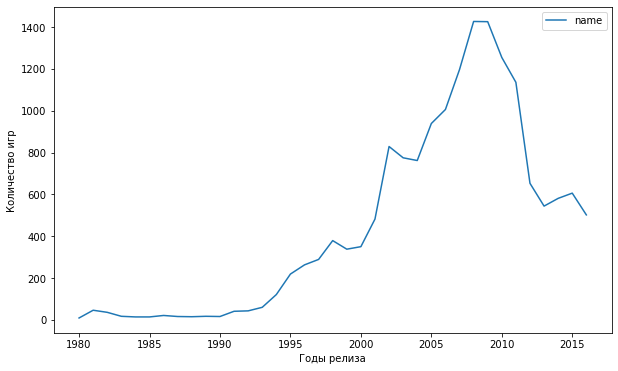

In [14]:
# построим график, отражающий, сколько игр в какие годы выпускалось
df.pivot_table(index='years_of_release', values='name', aggfunc='count').reset_index().plot(x='years_of_release', y='name', figsize=(10,6), xlabel='Годы релиза', ylabel='Количество игр')

2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

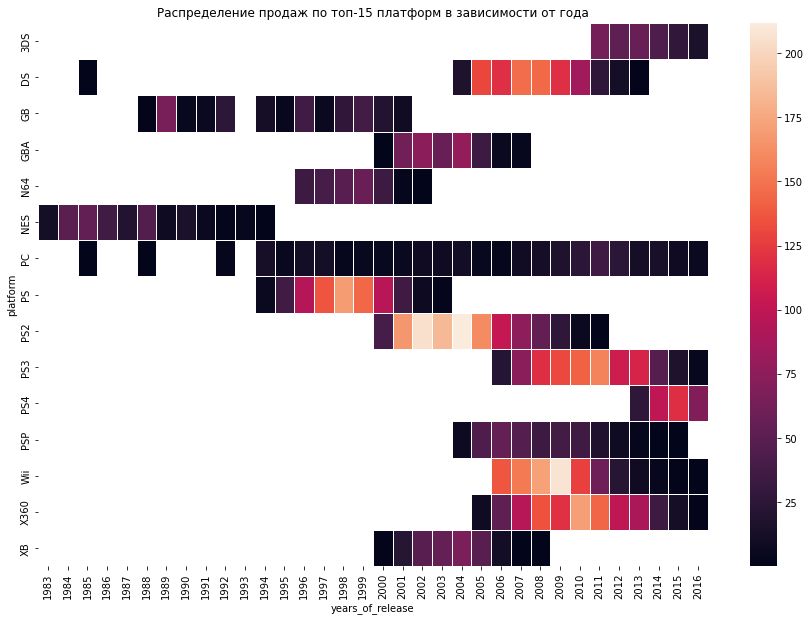

In [15]:
p_platf = list(df.pivot_table(index='platform',values='common_sales', aggfunc='sum').reset_index().sort_values('common_sales', ascending=False).reset_index(drop=True).head(15)['platform'])
# создаем список популярных платформ

df.query('platform in @p_platf').pivot_table(index=['platform', 'years_of_release'], values='common_sales', aggfunc='sum').reset_index().groupby('platform')
# по этим платформам строим сводную таблицу с группировкой

hmpp = df.query('platform in @p_platf').pivot_table(index='platform', columns='years_of_release', values='common_sales', aggfunc='sum')
# строим хитмеп
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(hmpp, annot=False, fmt=".1f", linewidths=1, ax=ax)
ax.set_title('Распределение продаж по топ-15 платформ в зависимости от года')
plt.show()

Промежуточный вывод 1: 
 - PC - внизу топа, но очень стабилен, появляется на графике с 1985 года и не пропадает до 2016 года. 
 - У остальных платформ срок жизни ограничен 5-12 годами с яркими пиками и последующим спадом продаж. 
 - Срок жизни платформы увеличивается с течением времени. 

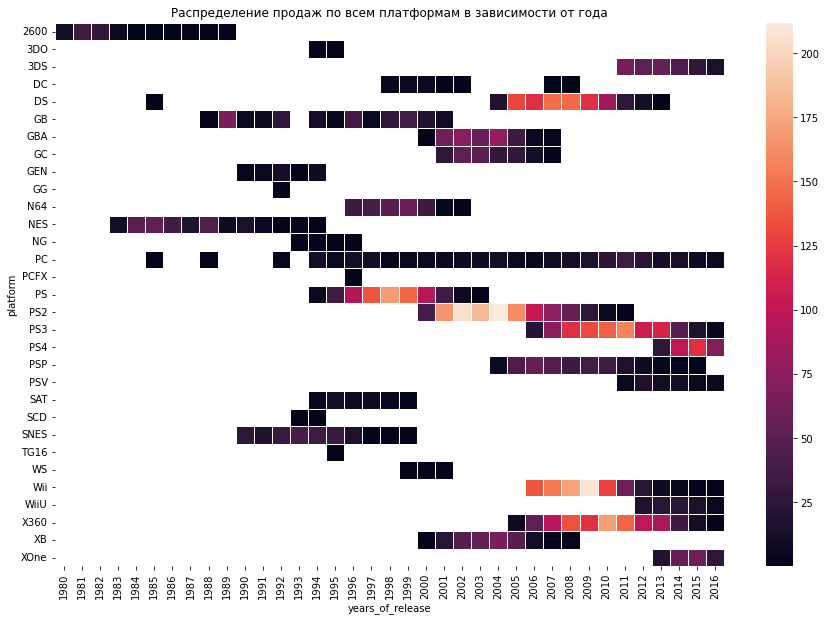

In [16]:
p_platf = list(df.pivot_table(index='platform',values='common_sales', aggfunc='sum').reset_index().sort_values('common_sales', ascending=False).reset_index(drop=True)['platform'])
df.query('platform in @p_platf').pivot_table(index=['platform', 'years_of_release'], values='common_sales', aggfunc='sum').reset_index().groupby('platform')

hmpp = df.query('platform in @p_platf').pivot_table(index='platform', columns='years_of_release', values='common_sales', aggfunc='sum')
fig, ax = plt.subplots(figsize=(15,10))
sb.heatmap(hmpp, annot=False, fmt=".1f", linewidths=1, ax=ax)
ax.set_title('Распределение продаж по всем платформам в зависимости от года')
plt.show()

Промежуточный вывод 2:
- Теория о сроке жизни в 5-12 лет подтверждается на общей таблице. 
- В связи с этим можно брать для прогнозирования "коридор" в 5-10 лет, чтобы захватить максимальное количество платформ и данных для анализа.
- Ни одна платформа не становилась "бестселлером" по продаже игр в первый год жизни - самые активные продажи начинаются со второго, кроме исключения - Wii. 
- Срок жизни консолей составляет 8-10 лет. Тенденция прослеживается в любой серийной консоли - PS, Xbox, Nintendo. 



test_name = df.pivot_table(index=['platform','years_of_release'], values='common_sales', aggfunc='sum').groupby('years_of_release').count()
ax = plt.axes()
sb.heatmap(test_name, annot=False, ax=ax)
ax.set_title('Количество платформ, в зависимости от года, на которых были релизы игр')
plt.show()

Промежуточный вывод 3:

Хитмеп подтверждается, что максимальный срок жизни - чуть больше 10 лет, поэтому гипотеза о сроке жизни, выдвинутая в выводе 2, подтверждается. Так же по графикам видно, что с течением времени срок жизни платформы увеличивается. 

3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальным периодом считаю период в 10 лет - он позволяет включить в анализ консоли, которые находятся как в середине жизненного цикла "на пике", так и умирающие консоли, на которых однако тоже происходят релизы. 

4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='platform', ylabel='years_of_release'>

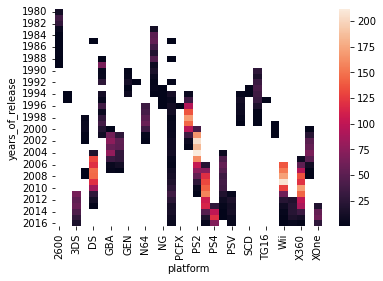

In [17]:
#лидеры валовых продаж 
sb.heatmap(df.pivot_table(index='years_of_release', columns='platform', values='common_sales', aggfunc='sum'))

<AxesSubplot:xlabel='years_of_release'>

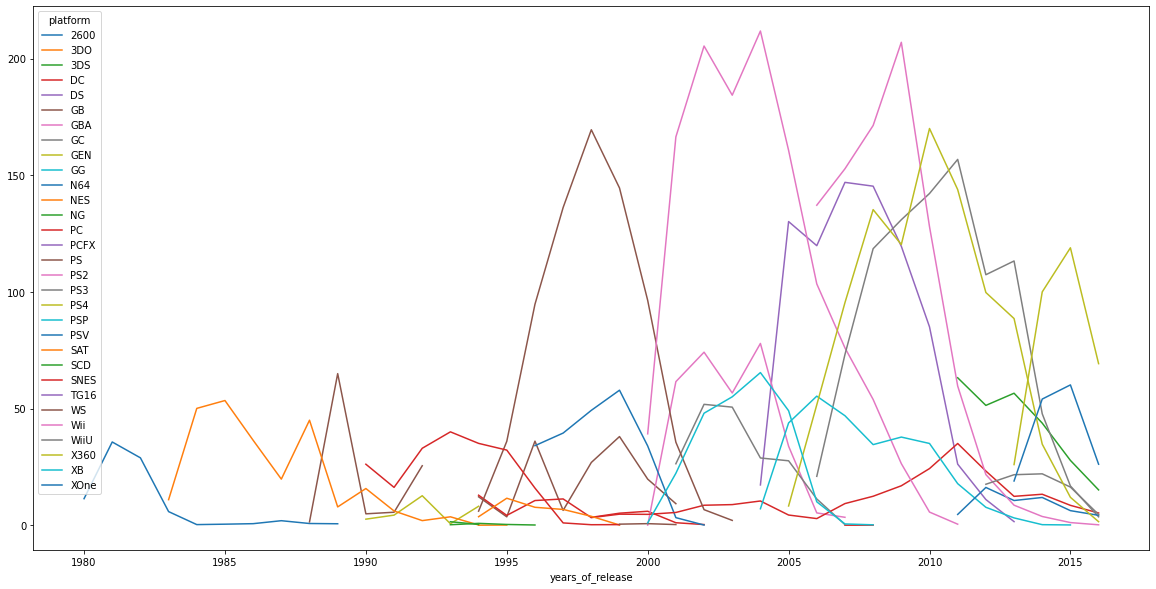

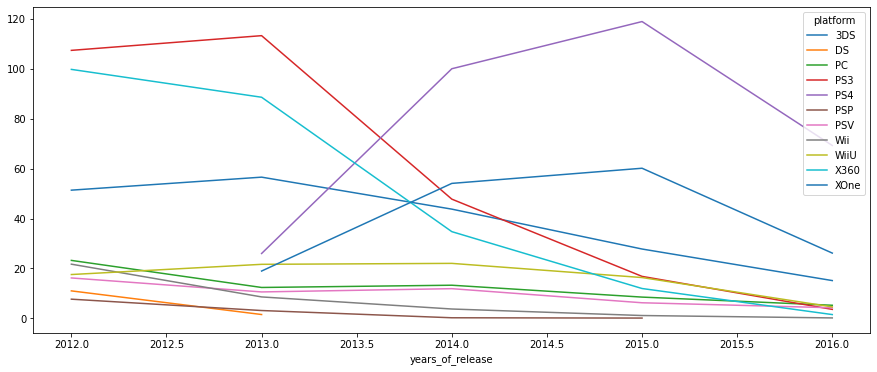

In [45]:
# строим график по платформам в динамике продаж: 
df.pivot_table(index='years_of_release', columns='platform', values='common_sales', aggfunc='sum').plot(figsize=(20, 10))
# график нечитаем, добавим ограничение на актуальные (не умершие) платформы по году выхода игр - от 2011 года:
df.query('years_of_release > 2011').pivot_table(index='years_of_release', columns='platform', values='common_sales', aggfunc='sum').reset_index().plot(x='years_of_release', figsize=(15, 6))
# Видим, что падают в принципе все, кто-то сильнее (исключение - PSP, по графику есть хоть какой-то рост)

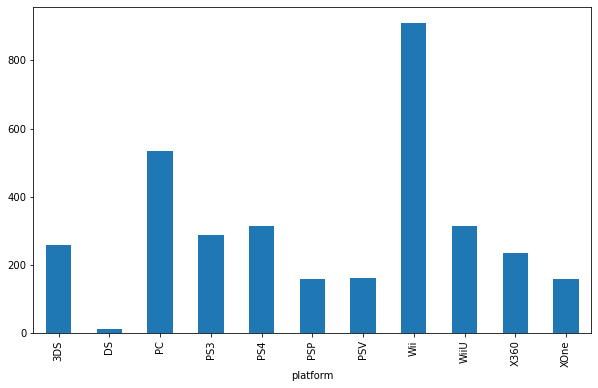

In [19]:
# определим лидеров по валовым продажам начиная с 2006 года
df.query('years_of_release > 2006').groupby('platform')['common_sales'].sum().plot(kind='bar', figsize=(10,6))
# видно, что сильно выбиваются консоли предыдущего поколения, на которых в будущем уже не будет новых игр
# изменим фильтр на 5 лет
df.query('years_of_release > 2011').groupby('platform')['common_sales'].sum().plot(kind='bar', figsize=(10,6))
# основные лидеры видны, занесем в список
profits_platform=list(df.query('years_of_release > 2011').groupby('platform')['common_sales'].sum().reset_index()['platform'])

<AxesSubplot:xlabel='years_of_release'>

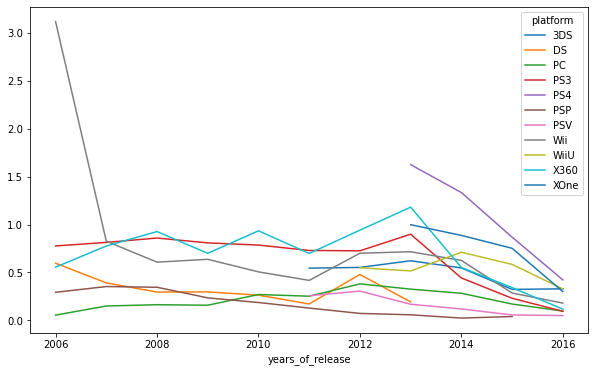

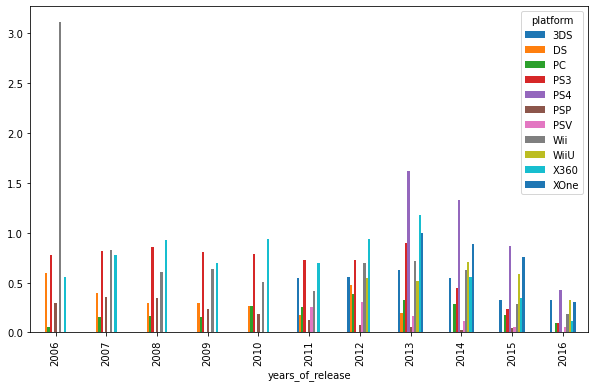

In [20]:
# рассморим динамику по этим платформам за 6 лет
#sb.heatmap(df.query('platform in @profits_platform'), )
x = df.query('platform in @profits_platform & years_of_release > 2005')[['years_of_release', 'common_sales', 'platform']].pivot_table(index='years_of_release',columns='platform',values='common_sales').reset_index()
# таблица создана исключительно для упрощения написания графиков
# год выбран как 2005 чтобы видеть лучшую динамику по этим платформам
x.plot(x='years_of_release', figsize=(10,6))
x.plot(kind='bar', x='years_of_release', figsize=(10,6))

5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

/Users/artemdudkin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count      31.000000
mean      284.334516
std       343.954144
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: common_sales, dtype: float64

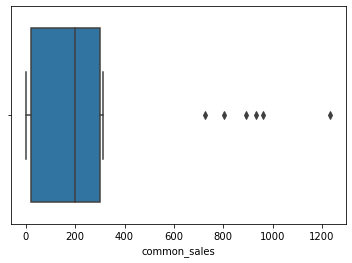

In [21]:
# не указана привязка к году, поэтому строим по валовым продажам
sb.boxplot(df.groupby('platform')['common_sales'].sum())
# для цифрового анализа воспользуемся методом describe()
df.groupby('platform')['common_sales'].sum().describe()

Видно, что межквартильный размах минимален - основное число платформ по валовым продажам находится возле медианы. А вот выбросы - это топовые платформы, они на порядок выше по продажам, чем остальные. Рынок неравномерно поделен: большую часть выручки забирают платформы-монополисты, а остальные находятся в аутсайдерах.

Text(0, 0.5, 'Объем продаж')

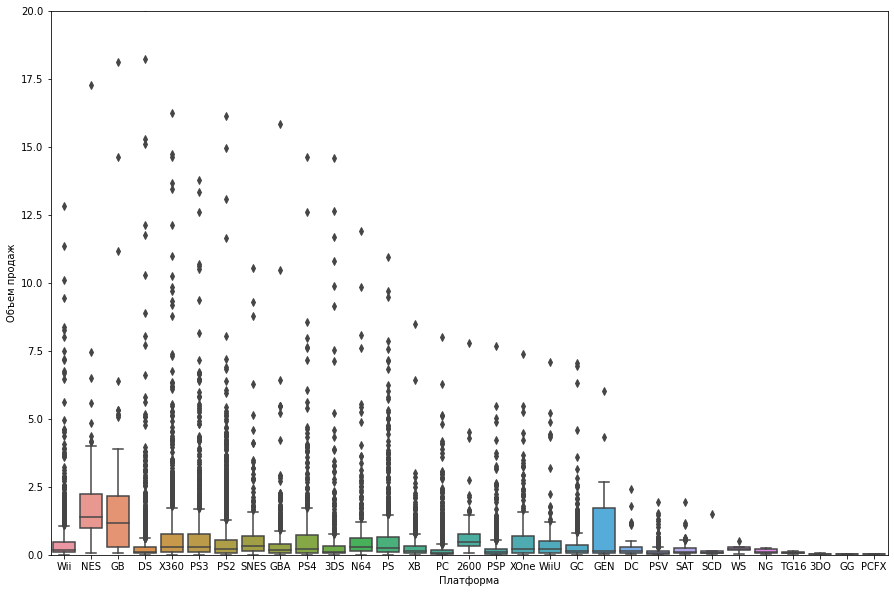

In [22]:
plt.figure(figsize=(15,10))
sb.boxplot(data=df, x='platform', y='common_sales')
plt.ylim([0,20])
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')

Text(0, 0.5, 'Объем продаж')

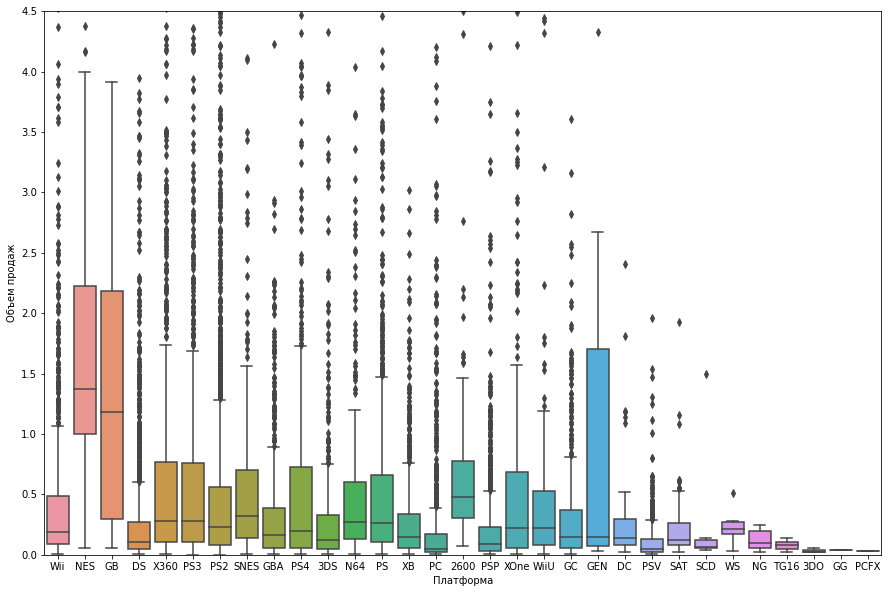

In [23]:
plt.figure(figsize=(15,10))
sb.boxplot(data=df, x='platform', y='common_sales')
plt.ylim([0,4.5])
plt.xlabel('Платформа')
plt.ylabel('Объем продаж')

6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

In [24]:
# для анализа возьмем платформу PC
df.query('platform == "PC" & years_of_release > 2011')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr()
df.query('platform == "PC" & user_score != "tbd" & years_of_release > 2011')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr()
# видим, что столбец user_score не подгружается из-за значений tbd

,na_sales,eu_sales,jp_sales,other_sales,common_sales,critic_score
na_sales,1.000000,0.820829,NaN,0.921177,0.945577,0.217961
eu_sales,0.820829,1.000000,NaN,0.916417,0.961300,0.236627
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,0.921177,0.916417,NaN,1.000000,0.969702,0.227282
common_sales,0.945577,0.961300,NaN,0.969702,1.000000,0.237243
critic_score,0.217961,0.236627,NaN,0.227282,0.237243,1.000000


In [25]:
# создадим копию фрейма, и приведем в нем все значения из user_score во float64
df_copy = df.copy()
df_copy.loc[(df_copy['user_score'] == "tbd"), 'user_score'] = 0
df_copy['user_score'] = df_copy['user_score'].astype('float64')
display(df_copy.query('platform == "PC"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr())
# странно, что оценки пользователей не влияют на продажи

df_copy.query('user_score != 0 & years_of_release > 2011').count() # всего 7462 ненулевых значения из 16 тысяч строк

# сделаем расчет корреляции по той части фрейма, где есть оценка пользователей: 

df_copy.query('user_score != 0 & platform == "PC" & years_of_release > 2011')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr()

# ничего особо не изменилось, особого влияния на продажи оценка не оказывает
# интересно что есть связь между оценками пользователей и критиков - вот они друг на друга влияют значительно

,na_sales,eu_sales,jp_sales,other_sales,common_sales,critic_score,user_score
na_sales,1.000000,0.404902,0.399759,0.391400,0.805568,0.192556,0.052983
eu_sales,0.404902,1.000000,-0.015509,0.557374,0.862848,0.222657,0.050161
jp_sales,0.399759,-0.015509,1.000000,-0.015288,0.204008,0.096030,0.054618
other_sales,0.391400,0.557374,-0.015288,1.000000,0.636874,0.208501,0.037510
common_sales,0.805568,0.862848,0.204008,0.636874,1.000000,0.257395,0.062628
critic_score,0.192556,0.222657,0.096030,0.208501,0.257395,1.000000,0.547307
user_score,0.052983,0.050161,0.054618,0.037510,0.062628,0.547307,1.000000


,na_sales,eu_sales,jp_sales,other_sales,common_sales,critic_score,user_score
na_sales,1.000000,0.820829,NaN,0.921177,0.945577,0.217961,-0.115004
eu_sales,0.820829,1.000000,NaN,0.916417,0.961300,0.236627,-0.120834
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,0.921177,0.916417,NaN,1.000000,0.969702,0.227282,-0.107965
common_sales,0.945577,0.961300,NaN,0.969702,1.000000,0.237243,-0.121867
critic_score,0.217961,0.236627,NaN,0.227282,0.237243,1.000000,0.432587
user_score,-0.115004,-0.120834,NaN,-0.107965,-0.121867,0.432587,1.000000


In [26]:
# Комментарий ревьюера
df_copy.years_of_release.min()

1980

<AxesSubplot:xlabel='user_score', ylabel='common_sales'>

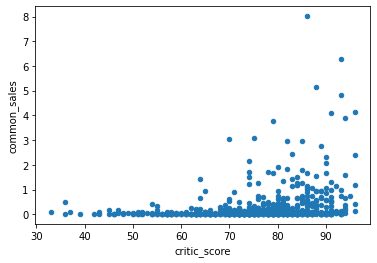

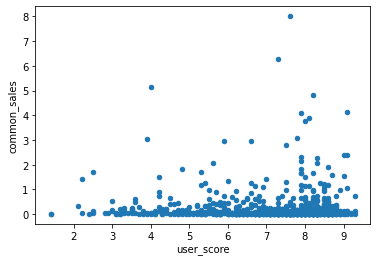

In [27]:
# строим диаграмму рассеяния
df_copy.query('user_score != 0 & platform == "PC"').plot(x='critic_score', y='common_sales', kind='scatter') # рассеяние понятно
df_copy.query('user_score != 0 & platform == "PC"').plot(x='user_score', y='common_sales', kind='scatter') # игнорируем пик в нулях, видим гораздо более рассеянную массу

Промежуточный вывод: 
В случае с ПК корреляция отзывов/оценок критиков едва стремится к средней в продажах по регионам и в целом. 

Проверим тем же методом PS4: 


In [28]:
display(df_copy.query('platform == "PS4"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr())
# даже без приведения user_score видим, что оценка в средней степени влияет на продажи как по регионам, так и в целом.

df_copy.query('user_score != 0 & platform == "PS4"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr()
# та же картина - критики и пользователи средне влияют на продажи. В два раза сильнее, чем по ПК, кстати.

,na_sales,eu_sales,jp_sales,other_sales,common_sales,critic_score,user_score
na_sales,1.000000,0.785362,0.472981,0.944259,0.928160,0.415008,0.030639
eu_sales,0.785362,1.000000,0.464563,0.944698,0.958157,0.346720,0.003444
jp_sales,0.472981,0.464563,1.000000,0.496467,0.527129,0.322358,0.187039
other_sales,0.944259,0.944698,0.496467,1.000000,0.998051,0.409191,0.020080
common_sales,0.928160,0.958157,0.527129,0.998051,1.000000,0.406568,0.023279
critic_score,0.415008,0.346720,0.322358,0.409191,0.406568,1.000000,0.520752
user_score,0.030639,0.003444,0.187039,0.020080,0.023279,0.520752,1.000000


,na_sales,eu_sales,jp_sales,other_sales,common_sales,critic_score,user_score
na_sales,1.000000,0.784706,0.470920,0.944086,0.927934,0.414918,-0.020933
eu_sales,0.784706,1.000000,0.462449,0.944525,0.958028,0.346515,-0.048925
jp_sales,0.470920,0.462449,1.000000,0.494335,0.525067,0.322120,0.171332
other_sales,0.944086,0.944525,0.494335,1.000000,0.998046,0.409061,-0.035639
common_sales,0.927934,0.958028,0.525067,0.998046,1.000000,0.406469,-0.031957
critic_score,0.414918,0.346515,0.322120,0.409061,0.406469,1.000000,0.557654
user_score,-0.020933,-0.048925,0.171332,-0.035639,-0.031957,0.557654,1.000000


7. Соотнесите выводы с продажами игр на других платформах.

In [29]:
# обращаемся к списку самых прибыльных платформ profits_platform который создали ранее
display(df_copy.query('platform in @profits_platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales','common_sales', 'critic_score', 'user_score']].corr())

,na_sales,eu_sales,jp_sales,other_sales,common_sales,critic_score,user_score
na_sales,1.000000,0.857270,0.444709,0.879828,0.956021,0.212714,0.135798
eu_sales,0.857270,1.000000,0.484243,0.945193,0.951773,0.224544,0.149135
jp_sales,0.444709,0.484243,1.000000,0.442660,0.597089,0.126671,0.136687
other_sales,0.879828,0.945193,0.442660,1.000000,0.942212,0.237380,0.159809
common_sales,0.956021,0.951773,0.597089,0.942212,1.000000,0.227022,0.155538
critic_score,0.212714,0.224544,0.126671,0.237380,0.227022,1.000000,0.513911
user_score,0.135798,0.149135,0.136687,0.159809,0.155538,0.513911,1.000000


Промежуточный вывод: в целом по платформам связь между отзывами и продажами слабая, в некоторых случаях - средняя. 

In [30]:
# profits_platform - ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
# можем строить корреляцию по списку

display('DS', df_copy.query('user_score != 0 & platform == "DS"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('3DS', df_copy.query('user_score != 0 & platform == "3DS"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('PC', df_copy.query('user_score != 0 & platform == "PC"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('PS3', df_copy.query('user_score != 0 & platform == "PS3"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('PS4', df_copy.query('user_score != 0 & platform == "PS4"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('PSP', df_copy.query('user_score != 0 & platform == "PSP"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('PSV', df_copy.query('user_score != 0 & platform == "PSV"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('Wii', df_copy.query('user_score != 0 & platform == "Wii"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('WiiU', df_copy.query('user_score != 0 & platform == "WiiU"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('X360', df_copy.query('user_score != 0 & platform == "X360"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))
display('XOne', df_copy.query('user_score != 0 & platform == "XOne"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))


# можно вообще цикл написать, только он не запускается (вероятно из-за неправильных кавычек в обозначении платформ):
#for i in profits_platform:
    #print(df_copy.query('user_score != 0 & platform = "i"')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()[['critic_score', 'user_score']].drop(labels=['critic_score', 'user_score'], axis=0))

'DS'

,critic_score,user_score
na_sales,0.213715,0.104827
eu_sales,0.194878,0.106729
jp_sales,0.259486,0.179645
other_sales,0.201724,0.108709


'3DS'

,critic_score,user_score
na_sales,0.325492,0.200297
eu_sales,0.300194,0.165741
jp_sales,0.339464,0.272660
other_sales,0.313205,0.184406


'PC'

,critic_score,user_score
na_sales,0.191954,0.042502
eu_sales,0.221764,-0.010203
jp_sales,0.095990,0.068320
other_sales,0.207609,-0.024820


'PS3'

,critic_score,user_score
na_sales,0.450629,0.137699
eu_sales,0.378263,0.087823
jp_sales,0.194475,0.171022
other_sales,0.390654,0.111490


'PS4'

,critic_score,user_score
na_sales,0.414918,-0.020933
eu_sales,0.346515,-0.048925
jp_sales,0.322120,0.171332
other_sales,0.409061,-0.035639


'PSP'

,critic_score,user_score
na_sales,0.270908,0.217033
eu_sales,0.246232,0.144769
jp_sales,0.151057,0.145198
other_sales,0.251047,0.157022


'PSV'

,critic_score,user_score
na_sales,-0.006921,-0.017071
eu_sales,0.127761,-0.125627
jp_sales,0.241756,0.295229
other_sales,0.084096,-0.077714


'Wii'

,critic_score,user_score
na_sales,0.170902,0.112922
eu_sales,0.156577,0.103604
jp_sales,0.195897,0.128395
other_sales,0.154612,0.103663


'WiiU'

,critic_score,user_score
na_sales,0.348332,0.386190
eu_sales,0.375308,0.422393
jp_sales,0.270853,0.339967
other_sales,0.364193,0.408980


'X360'

,critic_score,user_score
na_sales,0.373463,0.107545
eu_sales,0.380809,0.108751
jp_sales,0.279346,0.183939
other_sales,0.398166,0.122477


'XOne'

,critic_score,user_score
na_sales,0.383670,-0.069318
eu_sales,0.374916,-0.055911
jp_sales,0.200851,0.069591
other_sales,0.406786,-0.069645


Выводы подтверждаются - корреляция между отзывами и продажами слабая, выше 0.4 не подымается на прибыльных платформах.

8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre', ylabel='Продажи, млн штук'>

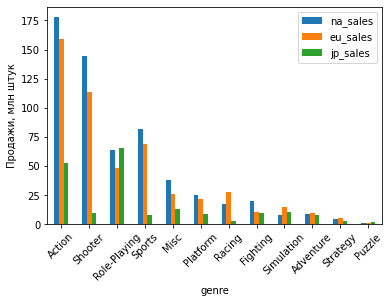

In [60]:
df.query('years_of_release > 2011').pivot_table(index='genre', values='common_sales').reset_index().sort_values('common_sales', ascending=False)
# в среднем самым популярным жанром является шутер

#сложим валовую выручку по всем жанрам:
df.query('years_of_release > 2011').pivot_table(index='genre', values='common_sales', aggfunc='sum').reset_index().sort_values('common_sales', ascending=False)
# валовая выручка больше у экшенов, спортивных игр, РПГ

xx=df.query('years_of_release > 2011').pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales','common_sales'], aggfunc='sum').reset_index().sort_values('common_sales', ascending=False)

# посмотрим как в разрезе по рынкам сбыта меняются продажи по жанрам. Видим что в Японии сильнее других рынков продаются РПГ
xx[['genre','na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', x='genre', rot=45, ylabel='Продажи, млн штук')

# видим как распределяются продажи по жанрам

<AxesSubplot:xlabel='Объем продаж в Японии', ylabel='Жанр'>

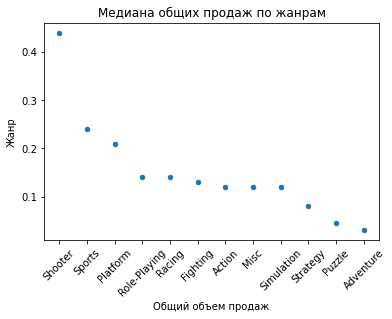

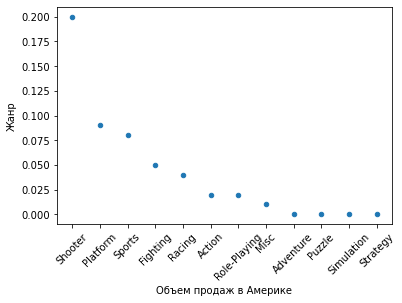

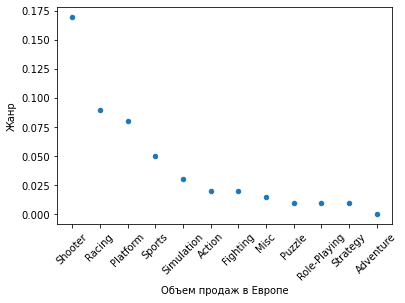

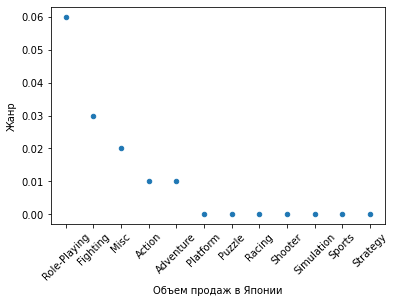

In [32]:
df.query('years_of_release > 2011').pivot_table(index='genre', values=['common_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').reset_index().sort_values('common_sales', ascending=False).plot(kind='scatter', x='genre', y='common_sales', rot=45, xlabel='Общий объем продаж', ylabel='Жанр')
plt.title('Медиана общих продаж по жанрам')
# разбил просто из интереса посмотреть что будет
df.query('years_of_release > 2011').pivot_table(index='genre', values=['common_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').reset_index().sort_values('na_sales', ascending=False).plot(kind='scatter', x='genre', y='na_sales', rot=45, xlabel='Объем продаж в Америке', ylabel='Жанр')
df.query('years_of_release > 2011').pivot_table(index='genre', values=['common_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').reset_index().sort_values('eu_sales', ascending=False).plot(kind='scatter', x='genre', y='eu_sales', rot=45, xlabel='Объем продаж в Европе', ylabel='Жанр')
df.query('years_of_release > 2011').pivot_table(index='genre', values=['common_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='median').reset_index().sort_values('jp_sales', ascending=False).plot(kind='scatter', x='genre', y='jp_sales', rot=45, xlabel='Объем продаж в Японии', ylabel='Жанр')

#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

•	Самые популярные жанры (топ-5). Поясните разницу.

•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


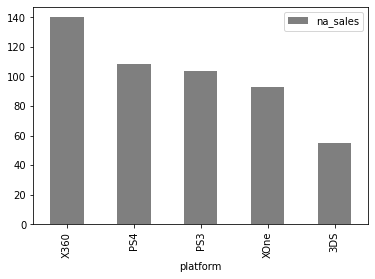

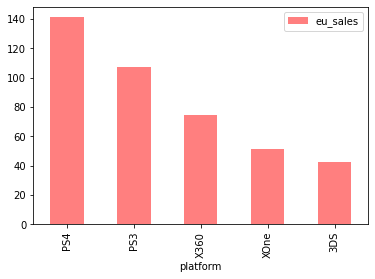

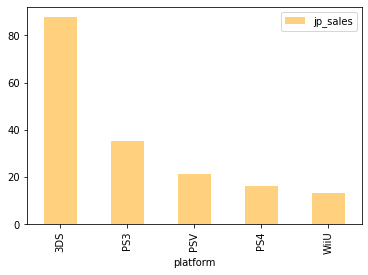

In [33]:
# Анализ рынков по объему продаж исходя из платформы
df.query('na_sales!=0 & years_of_release > 2011').groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', alpha=0.5, color='k', label='na_sales')
plt.legend()
plt.show()
df.query('eu_sales!=0 & years_of_release > 2011').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', alpha=0.5, color='r', label='eu_sales')
plt.legend()
plt.show()
df.query('jp_sales!=0 & years_of_release > 2011').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', alpha=0.5, color='orange', label='jp_sales')
plt.legend()

Промежуточный вывод: 

В Северной Америке самые популярные платформы - иксбокс прошлого поколения и PS4. С отрывом идут PS3 и Xbox One. В европе - PS4 и почти догнавшая ее PS3, догоняет иксбокс прошлого поколения и его обновленная версия. В Японии традиционно силен Нинтендо и Сони. 

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

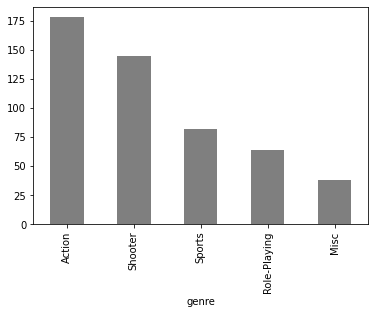

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

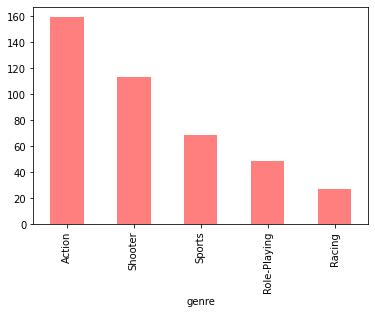

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

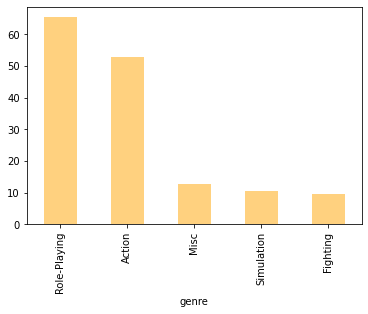

In [34]:
# Анализ рынков по объему продаж исходя из жанра
df.query('na_sales!=0 & years_of_release > 2011').groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', alpha=0.5, color='k')
display(df.query('na_sales!=0 & years_of_release > 2011').groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))
plt.show()
df.query('eu_sales!=0 & years_of_release > 2011').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', alpha=0.5, color='r')
display(df.query('eu_sales!=0 & years_of_release > 2011').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))
plt.show()
df.query('jp_sales!=0 & years_of_release > 2011').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', alpha=0.5, color='orange')
display(df.query('jp_sales!=0 & years_of_release > 2011').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5))


На Американском рынке лучшим жанром можно считать экшены, их общий объем продаж составляет 177.84 млн копий, следом идут шутеры, но их на 22% меньше. Уже на 70% меньше покупают спортивные симуляторы. Видим, на сколько популярнее эти два жанра. 

На Европейском рынке по первым двум жанрам ситуация аналогична, только объемы продаж в копиях меньше: 159 и 113 миллионов для экшена и шутера соответственно. Так же с отрывом идут спортивные симуляторы - на 63% меньше продаж чем шутеров.

На Японском рынке ситуация иная: сам объем продаж сильно меньше, при этом в топе находятся ролевые игры со значением в 65млн, следом идут экшены - 52млН. Отставание не столь значительное как на других рынках, так же с огромным отрывом идет третья позиция. 

Промежуточный вывод: 
В Америке и Европе трио популярных жанров совпадает, в Японии с отрывом идет РПГ. 


Text(0.5, 0, 'Америка')

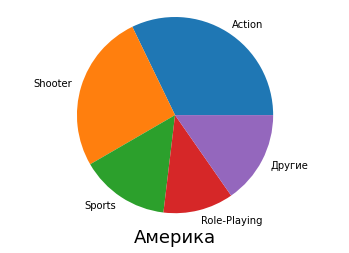

In [35]:
# Анализ рынков по объему продаж исходя из жанра
df.query('na_sales!=0 & years_of_release > 2011').groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
others = df.query('na_sales!=0 & years_of_release > 2011').groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().loc[5:11, 'na_sales'].sum()
labels = ["Action", "Shooter", "Sports", "Role-Playing", "Другие"]
vals = [177.84, 144.77, 81.53, 64.00, others]
fig, ax = plt.subplots()
ax.pie(vals, labels=["Action", "Shooter", "Sports", "Role-Playing", "Другие"])
ax.axis("equal")
plt.xlabel('Америка', fontsize=18)

Text(0.5, 0, 'Европа')

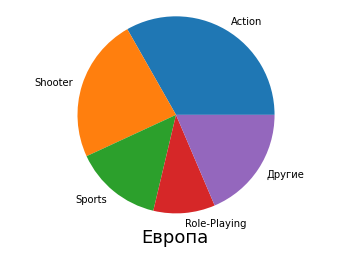

In [36]:
df.query('eu_sales!=0 & years_of_release > 2011').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
others = df.query('eu_sales!=0 & years_of_release > 2011').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().loc[5:11, 'eu_sales'].sum()
labels = ["Action", "Shooter", "Sports", "Role-Playing", "Другие"]
vals = [159.34, 113.47, 69.09, 48.53, others]
fig, ax = plt.subplots()
ax.pie(vals, labels=["Action", "Shooter", "Sports", "Role-Playing", "Другие"])
ax.axis("equal")
plt.xlabel('Европа', fontsize=18)

Text(0.5, 0, 'Япония')

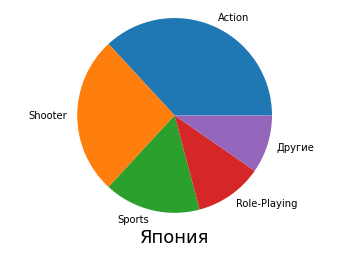

In [37]:
df.query('jp_sales!=0 & years_of_release > 2011').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
others = df.query('jp_sales!=0 & years_of_release > 2011').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().loc[5:11, 'jp_sales'].sum()
labels = ["Action", "Shooter", "Sports", "Role-Playing", "Другие"]
vals = [159.34, 113.47, 69.09, 48.53, others]
fig, ax = plt.subplots()
ax.pie(vals, labels=["Action", "Shooter", "Sports", "Role-Playing", "Другие"])
ax.axis("equal")
plt.xlabel('Япония', fontsize=18)

<AxesSubplot:xlabel='rating'>

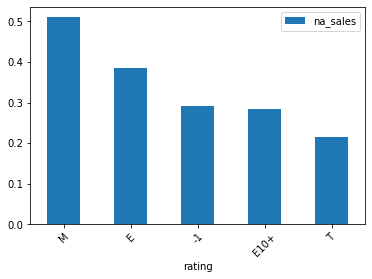

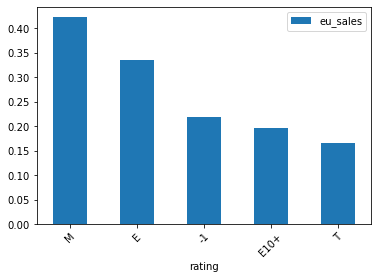

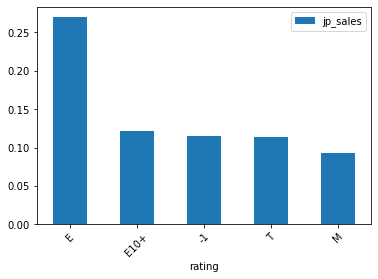

In [52]:
# Анализ рынков по объему продаж исходя из рейтинга
df.query('na_sales!=0 & years_of_release > 2011').pivot_table(index='rating', values='na_sales').reset_index().sort_values('na_sales', ascending=False).plot(x='rating', kind='bar', rot=45)
df.query('eu_sales!=0 & years_of_release > 2011').pivot_table(index='rating', values='eu_sales').reset_index().sort_values('eu_sales', ascending=False).plot(x='rating', kind='bar', rot=45)
df.query('jp_sales!=0 & years_of_release > 2011').pivot_table(index='rating', values='jp_sales').reset_index().sort_values('jp_sales', ascending=False).plot(x='rating', kind='bar', rot=45)

Промежуточный вывод: 
В Европе геймеры явно старше - с отрывом идут игры рейтинга "для взрослых". Второе место - "для всех". В общем картина ясна. В америке одинаково покупают игры для детей и для взрослых. В Японии наоборот, жестокие игры покупают меньше, чем игры для любых возрастов.
Во всех трех графиках третий по популярности у пользователей "рейтинг" - это "заглушка", игры без рейтинга - стоит сделать на этом упор, если будет рекламный бюджет.


Очевидно, что рейтинг влияет на продажи. Видно, что в Америке и Европе в лидерах продаж есть игры с рейтингом 17+, 18+. Очевидно, что если бы рейтинговой системы не было, то дети так же как минимум интересовались бы этими играми.
Однако, исходя из того, что в этих странах лидерами (либо одним из лидеров) по продажам являются игры с максимальным возрастным рейтингом, в контексте задачи конечно ясно, что рейтинг не сильно влияет на продажи: кто хочет купить - и так купит, невзирая на рейтинг. Но то, что часть несовершеннолетних покупателей рейтинг отсекает - это факт. 

In [39]:
# Комментарий ревьюера
temp = df.query('na_sales!=0 & years_of_release > 2006').copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

989 0.1566360468799493


E       1989
T       1353
E10+    1065
M        912
EC         6
Name: rating, dtype: int64

#### Шаг 5. Проверка гипотез.

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


In [57]:
# уберем NaN
df_copy['user_score'] = df_copy['user_score'].fillna(0)
# сформируем два массива для проверки гипотез

# df_copy.query('platform == "XOne"').sort_values('years_of_release', ascending=True) - 
# первые игры на Xbox One начали выходить с 2013 года, поправим фильтр на 2013 год

x_one = df_copy.query('platform == "XOne" & user_score > 0 & years_of_release > 2013')['user_score']
pc = df_copy.query('platform == "PC" & user_score > 0 & years_of_release > 2013')['user_score']
x_one_mean = df_copy.query('platform == "XOne" & user_score > 0 & years_of_release > 2013')['user_score'].mean()
pc_mean = df_copy.query('platform == "PC" & user_score > 0 & years_of_release > 2013')['user_score'].mean()


# посмотрим на распределение
#pc.hist(bins=30)
#plt.show()
#x_one.hist(bins=30)
# графики смещены

# проверим равенство дисперсий
x_one_var=np.var(x_one) # 1.8965188383045533
pc_var=np.var(pc) # 2.3461128196131775
# не равны

alpha = 0.05
# нулевая гипотеза: средние пользовательские рейтинги платформ равны:
ttest_platf = scipy.stats.ttest_ind(x_one, pc, equal_var=False)

print("Нулевая гипотеза: средние пользовательские рейтинги платформ равны")
print(f'P-value равно: {ttest_platf.pvalue}')
print('Средний рейтинг у XOne:', x_one_mean)
print('Средний рейтинг у PC :', pc_mean)
if ttest_platf.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")    

Нулевая гипотеза: средние пользовательские рейтинги платформ равны
P-value равно: 0.11601398086668827
Средний рейтинг у XOne: 6.594545454545453
Средний рейтинг у PC : 6.298360655737703
Не отвергаем нулевую гипотезу


In [56]:
# Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
# выборки берем с учетом того, что середина жизненного цикла актуальной платформы = 5 лет
action = df_copy.query('genre == "Action" & user_score > 0 & years_of_release > 2011')['user_score']
sports = df_copy.query('genre == "Sports" & user_score > 0 & years_of_release > 2011')['user_score']
action_mean = df_copy.query('genre == "Action" & user_score > 0 & years_of_release > 2011')['user_score'].mean()
sports_mean = df_copy.query('genre == "Sports" & user_score > 0 & years_of_release > 2011')['user_score'].mean()


# посмотрим на распределение
#action.hist(bins=30)
#plt.show()
#sports.hist(bins=30)
# графики смещены

# проверим равенство дисперсий
action_var=np.var(action) # 2.026364874182167
sports_var=np.var(sports) # 2.6206293039045394
# не равны
alpha = 0.05
# нулевая гипотеза: средние пользовательские рейтинги жанров Экшн и Спорт равны:
ttest_genre = scipy.stats.ttest_ind(action, sports, equal_var=False)

print("Нулевая гипотеза: средние пользовательские рейтинги жанров Экшн и Спорт равны")
print(f'P-value равно: {ttest_genre.pvalue}')
# добавил средние
print('Средний рейтинг у экшенов:', action_mean)
print('Средний рейтинг у спортивных симуляторов:', sports_mean)

if ttest_genre.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")  

Нулевая гипотеза: средние пользовательские рейтинги жанров Экшн и Спорт равны
P-value равно: 4.24307776572644e-20
Средний рейтинг у экшенов: 6.825047801147237
Средний рейтинг у спортивных симуляторов: 5.455897435897437
Отвергаем нулевую гипотезу


#### Итоговый вывод. 

Была поставлена задача - спрогнозировать рекламную компанию на 2017 год.

Были проанализированы столбцы таблицы и обнаружены следующие моменты: 
- удалены несколько строк с битыми данными;
- значения Nan преобразованы в нулевые, чтобы использовать их в дальнейшем, не удаляя строку целиком;

В исследовательском анализе были обнаружены следующие моменты:
- несмотря на то, что данные представлены с 1983 года, для целей исследования есть смысл собирать только данные за последние 5 лет. 
Основная аргументация следующая:
- срок жизни современной консоли составляет примерно 10 лет. Изначально для анализа был выбран именно этот период, чтобы оценить не только оперативный смысл инвестиций в рекламу, но и стратегический - чтобы забрать все части рынка, можно вкладываться в рекламу даже по тем платформам, которые уже не новы, но есть у большого числа пользователей. 
- PC как платформа - внизу топа продаж, но очень стабилен, появляется на графике с 1985 года и не пропадает до 2016 года. Поэтому выбран в качестве отправной точки по анализу продаж внутри одной платформы.  
- У остальных платформ срок жизни ограничен 5-12 годами с яркими пиками и последующим спадом продаж.
- Срок жизни платформы увеличивается с течением времени - увеличивается количество релизов на поздних этапах жизни платформы. 
- Проанализировав десятилетний коридор пришел к выводу, что в него попадает много откровенно старых платформ, на которых уже нет релизов и расходы на рекламу себя не окупят. Поэтому был выбран и применен пятилетний коридор: захватить и самые новые платформы в начале жизненного цикла, и предыдущее поколение "в середине" жизненного цикла. 


По графику boxplot видим так же, что топовые платформы забирают большую часть рынка (являются выбросами с огромным отрывом от общей массы), они на порядок выше по продажам, чем остальные (прошлые поколения). Рынок неравномерно поделен.
Было обнаружено, во-первых, что на почти половину игр отсутствуют отзывы пользователей, либо стоит отметка "мало данных для формирования оценки". Это привело к сильному урезанию выборки для исследования. 
Однако, даже по ней можно сказать, что связь между оценками пользователей/критиков и объемом продаж как в целом, так и по рынкам - как максимум "средняя". Прямой связи "хорошая оценка = много продаж" нет нигде.

Самыми прибыльными жанрами "в общем" можно считать: шутер, экшен, РПГ. Самыми низкими продажами обладают стратегии и паззлы.
Однако, обязательно следует делать разбивку по рынкам: японский сильно отличается от европейского и американского:
 - В Америке и Европе два популярных жанра совпадают (экшн - шутер), в Японии с отрывом идет РПГ. 
 - В Европе геймеры явно старше - с отрывом идут игры рейтинга "для взрослых". Второе место - "для всех". В общем картина ясна. В америке одинаково покупают игры для детей и для взрослых. В Японии наоборот, жестокие игры покупают меньше, чем игры для любых возрастов.
 - В Северной Америке самые популярные платформы - иксбокс прошлого поколения и PS4. С отрывом идут PS3 и Xbox One. В европе - PS4 и почти догнавшая ее PS3, догоняет иксбокс прошлого поколения и его обновленная версия. В Японии традиционно силен Нинтендо (3DS) и Сони. 

Поэтому, на Американском рынке стоит делать ставку на игры для Икс-бокс и PS-платформ, особенно на набирающую силу Ps4. В европе - PS. В Японии - 3DS и PS. ПК не стоит игнорировать, но и ставку делать на него не следует - нужен как поддержка интереса стабильного коммьюнити вокруг платформы. 

Очевидно, что рейтинг влияет на продажи. Видно, что в Америке и Европе в лидерах продаж есть игры с рейтингом 17+, 18+. Очевидно, что если бы рейтинговой системы не было, то дети так же как минимум интересовались бы этими играми.
Однако, исходя из того, что в этих странах лидерами (либо одним из лидеров) по продажам являются игры с максимальным возрастным рейтингом, в контексте задачи конечно ясно, что рейтинг не сильно влияет на продажи: кто хочет купить - и так купит, невзирая на рейтинг. Но то, что часть несовершеннолетних покупателей рейтинг отсекает - это факт. 

Портретом клиента можем считать:
- для европы и америки: человек средних доходов (потому что есть деньги на консоль актуального/предыдущего поколения, совсем старые не используют уже), любитель агрессивного геймплея (шутеров, экшенов), возможно средних лет - много игр для подростков продается, причем при цене консоли/игр - явно не они их себе покупают; 
- для японии: любитель "домашних" японских платформ и игр к ним в ролевом жанре. 

По итогам проверки гипотез выяснили, что:
 - средние пользовательские рейтинги жанров Экшн и Спорт не равны
 - средние пользовательские рейтинги платформ равны

По итогу анализа, как приоритетные можем обозначить следующие признаки, по которым размещаем рекламу: 
 - Регион - Северная Америка (т.к самая большая доля рынка) и Европа (вторая по объемам и родственна по платформам)
 - Жанр - Экшен (т.к самая большая доля продаж на этом рынке), следом - шутеры.
 - С рейтингом М (и Е, если будет бюджет).
 - Платформа - PS4 (она популярна и там и там). (PS5 игнорируем, т.к в 2016 она только набирает обороты и эксклюзивов на ней еще почти нет), 
(следом X360 и Xone если будет бюджет)
 - Японский рынок подключаем только если будут средства, упор - РПГ с рейтингом Е на консолях японских производителей;